In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("Algerian_forest_fire_cleaned.csv")
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
data.drop(["day","month","year"],axis=1,inplace=True)

In [5]:
data["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
#Encoding
data["Classes"]= np.where(data["Classes"].str.contains("not fire"),0,1)

In [7]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [8]:
data["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
#independent and dependent features
X= data.drop("FWI",axis=1) ##independent values

In [10]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [11]:
Y=data["FWI"]##dependent values

In [12]:
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [15]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [16]:
#feature selection
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


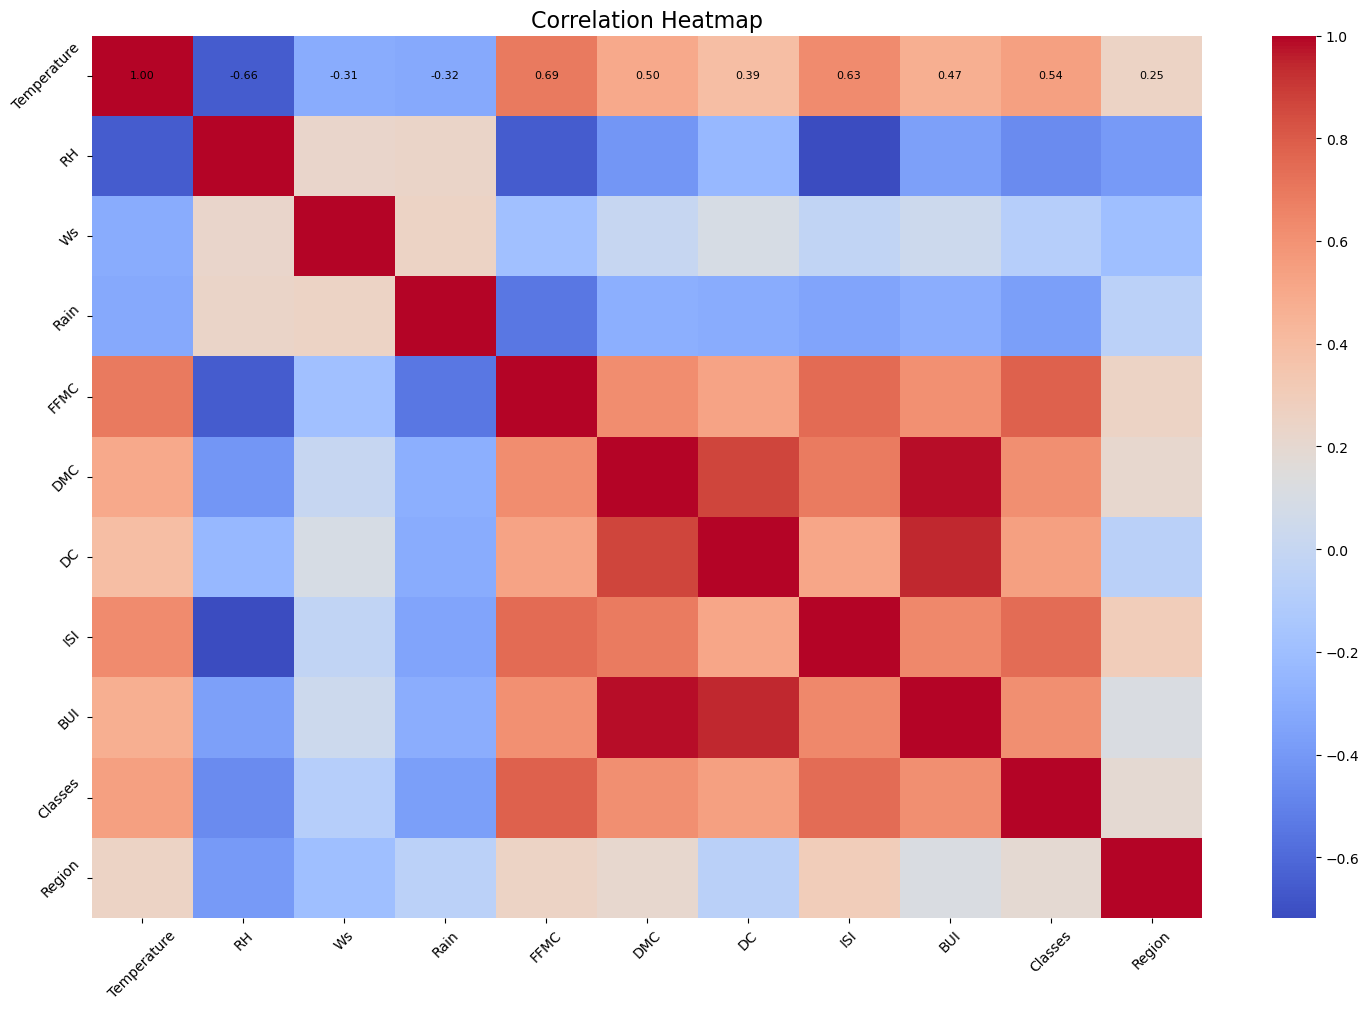

In [17]:
plt.figure(figsize=(15,10))  # Increase figure size
corr = X_train.corr()  # Compute correlation
annot_kws={"fontsize": 8, "color": "black"}
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"fontsize": 8, "color": "black"})  # Adjust font size
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [18]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname =corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr

In [19]:
corr_features= correlation(X_train,0.85)

In [20]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,1


In [21]:
X_test

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
24,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,1,0
152,28,58,18,2.2,63.7,3.2,8.5,1.2,3.3,0,1
232,34,58,13,0.2,79.5,18.7,88.0,2.1,24.4,0,1
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0,1
178,33,57,16,0.0,87.5,15.7,37.6,6.7,15.7,1,1
224,31,72,14,0.0,84.2,8.3,25.2,3.8,9.1,1,1
230,36,33,13,0.1,90.6,25.8,77.8,9.0,28.2,1,1


In [22]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [23]:
#two columns droped which have high correlation
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [24]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [25]:
## feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [26]:
X_train_scaler

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'X_train After Scaling')

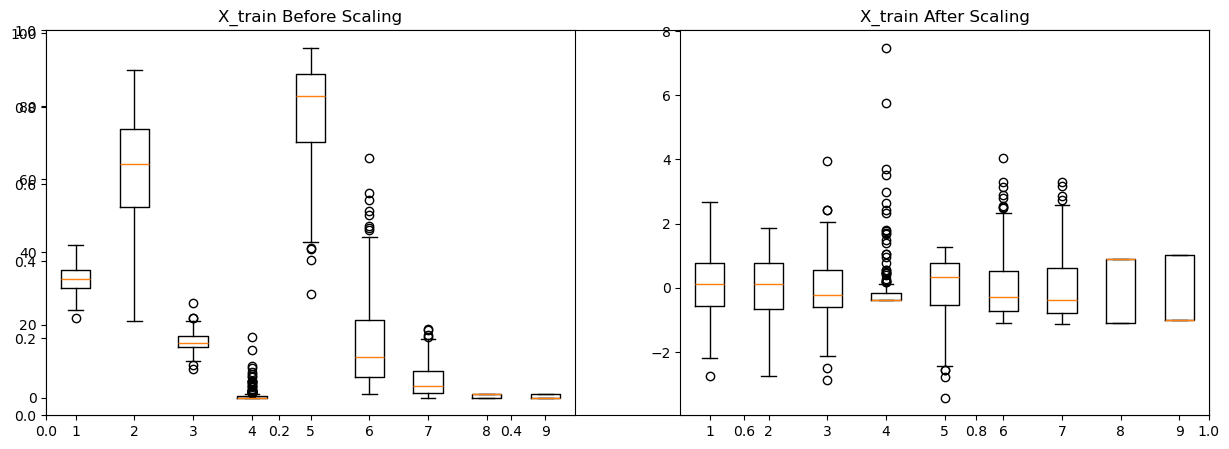

In [27]:
## Box PLot  To Understand the affect of Standard Scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(x=X_train)
plt.title("X_train Before Scaling")
plt.subplot(1,2,2)
plt.boxplot(x=X_train_scaler)
plt.title("X_train After Scaling")

## Model Training Using LinearRegression

Mea: 0.5468236465249976
r2_Score: 0.9847657384266951


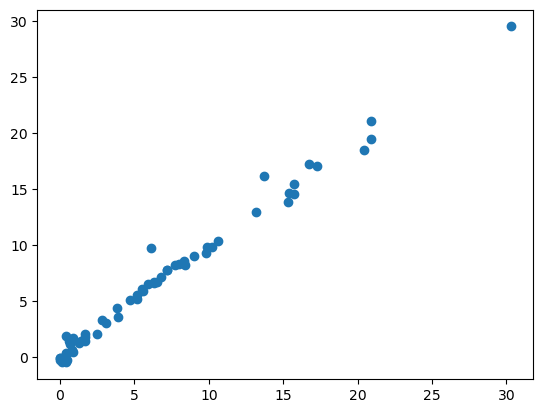

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaler,Y_train)
y_pred = linreg.predict(X_test_scaler)
mea = mean_absolute_error(Y_test,y_pred)
score= r2_score(Y_test,y_pred)
print("Mea:",mea)
print("r2_Score:",score)
plt.scatter(Y_test,y_pred)

# Lasso Regression

Mea: 1.1331759949144085
r2_Score: 0.9492020263112388


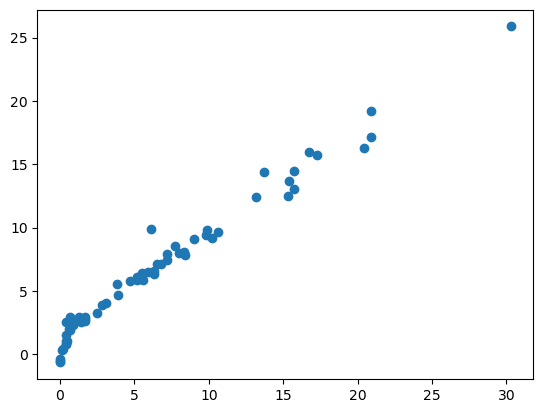

In [29]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaler,Y_train)
y_pred = lasso.predict(X_test_scaler)
mea = mean_absolute_error(Y_test,y_pred)
score= r2_score(Y_test,y_pred)
print("Mea:",mea)
print("r2_Score:",score)
plt.scatter(Y_test,y_pred)

## Cross validation Lasso

In [30]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaler,Y_train)


LassoCV(cv=5)

In [31]:
lassocv.predict(X_test_scaler)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

Mea: 0.6199701158263433
r2_Score: 0.9820946715928275


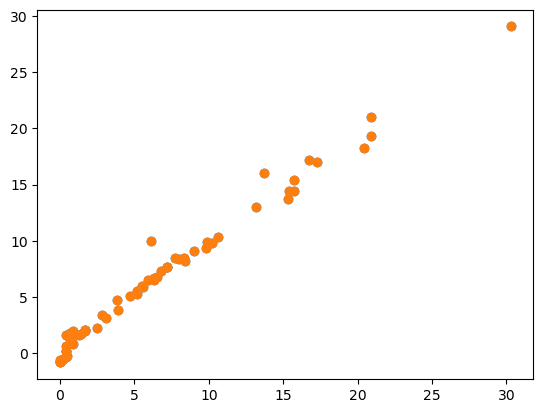

In [32]:
y_predd= lassocv.predict(X_test_scaler)
plt.scatter(Y_test,y_predd)
mea = mean_absolute_error(Y_test,y_predd)
score= r2_score(Y_test,y_predd)
print("Mea:",mea)
print("r2_Score:",score)
plt.scatter(Y_test,y_predd)

## Ridge Regression 

Mea: 0.5642305340105693
r2_Score: 0.9842993364555513


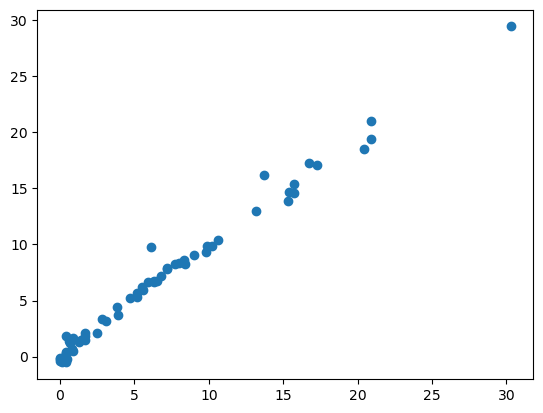

In [33]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaler,Y_train)
y_pred = ridge.predict(X_test_scaler)
mea = mean_absolute_error(Y_test,y_pred)
score= r2_score(Y_test,y_pred)
print("Mea:",mea)
print("r2_Score:",score)
plt.scatter(Y_test,y_pred)

## Ridge Cross Validation

Mea: 0.6199701158263433
r2_Score: 0.9842993364555513


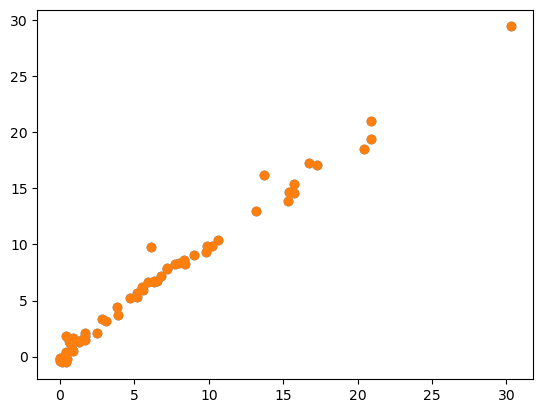

In [34]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaler,Y_train)
y_pred= ridgecv.predict(X_test_scaler)
plt.scatter(Y_test,y_pred)
mea = mean_absolute_error(Y_test,y_predd)
score= r2_score(Y_test,y_pred)
print("Mea:",mea)
print("r2_Score:",score)
plt.scatter(Y_test,y_pred)

## Elastic Regression(both features of lasso & ridge

Mea: 1.8822353634896
r2_Score: 0.8753460589519703


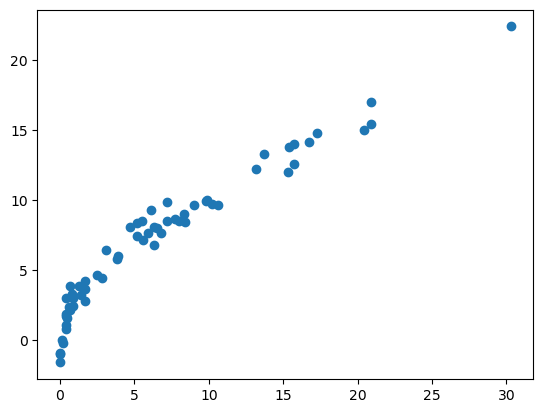

In [35]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaler,Y_train)
y_pred = elastic.predict(X_test_scaler)
mea = mean_absolute_error(Y_test,y_pred)
score= r2_score(Y_test,y_pred)
print("Mea:",mea)
print("r2_Score:",score)
plt.scatter(Y_test,y_pred)

## Elastic Cross Validation

Mea: 0.6199701158263433
r2_Score: 0.9814217587854941


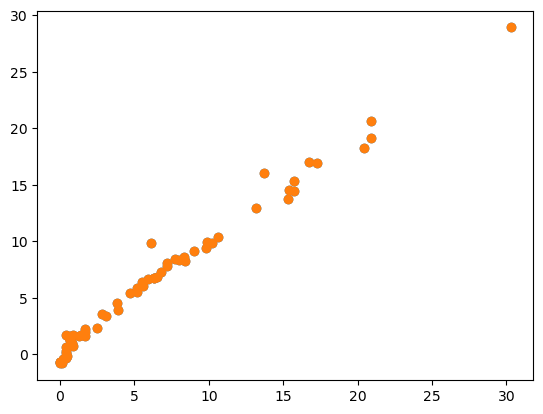

In [36]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaler,Y_train)
y_pred= elasticcv.predict(X_test_scaler)
plt.scatter(Y_test,y_pred)
mea = mean_absolute_error(Y_test,y_predd)
score= r2_score(Y_test,y_pred)
print("Mea:",mea)
print("r2_Score:",score)
plt.scatter(Y_test,y_pred)

In [37]:
scaler

StandardScaler()

In [38]:
ridge

Ridge()

In [40]:
import pickle 
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))